In [36]:
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [37]:
Employee_attrition_total_df = pd.read_csv("/content/drive/MyDrive/Tobigs/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [38]:
Employee_attrition_total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

결측치가 없는 클린데이터이다. 너무 좋다. \
Data의 개요를 살펴보면 \
**1470**명의 **data**, **32**개의 **Dependant variable**, **1**개의 **Independant variable**로 이루어져 있다.\
Independant variable은 **15**개의 **Categorical variable**, **17**개의 **Numerical variable**로 구성되어 있다. \
Data description에 나와있듯이 7개의 변수 ['Education', 'EnvironmentSatisfaction', 'JobInvolvement',' JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']
는 int 자료형으로 저장되어있지만 범주형 변수를 int형식으로 저장한 것이기 때문에 **categorical variable**에 포함한다. \
Dependant variable은 퇴사 여부를 Yes / No로 판단하는 **Categorical variable**이다.

In [39]:
Employee_attrition_total_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [40]:
Employee_attrition_total_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Dataframe의 describe 메소드로 통계량을 살펴봤을 때, 직원들의 나이는 18세부터 60세까지 존재하며 평균 나이는 대략 36.9세이다. \

직원들의 근속년수는 최소 0년부터 최대 40년까지, 평균 근속년수는 7년이다. \



In [41]:
Employee_attrition_total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [42]:
Employee_attrition_total_df['StandardHours'].describe()

count    1470.0
mean       80.0
std         0.0
min        80.0
25%        80.0
50%        80.0
75%        80.0
max        80.0
Name: StandardHours, dtype: float64

In [43]:
Employee_attrition_total_df['Over18'].describe()

count     1470
unique       1
top          Y
freq      1470
Name: Over18, dtype: object

In [44]:
Employee_attrition_total_df['EmployeeCount'].describe()

count    1470.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: EmployeeCount, dtype: float64

<Axes: >

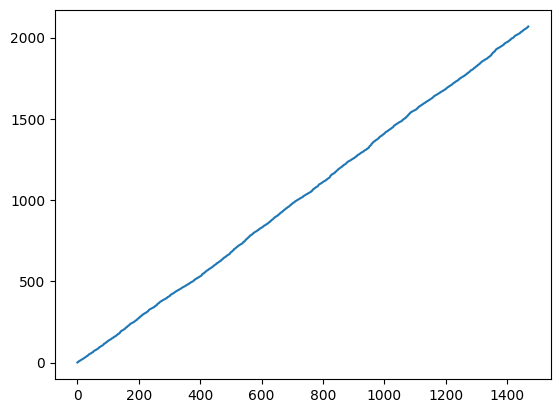

In [48]:
Employee_attrition_total_df.EmployeeNumber.plot()

In [49]:
Employee_attrition_total_df.drop(labels=['StandardHours', 'Over18', 'EmployeeCount', 'EmployeeNumber'], axis=1, inplace = True)

Total data를 살펴본 결과 'StandardHours', 'Over18', 'EmployeeCount' 데이터는 모든 raw의 데이터가 똑같으므로 전체 데이터셋에서 삭제한다. \

'EmployeeNumber'는 직원마다 부여받은 사번이므로 유의미한 통계를 낼 수 없어 전체 데이터셋에서 삭제한다.

In [53]:
Numerical_variable_column_list = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [54]:
Categorical_variable_column_list = [x for x in list(Employee_attrition_total_df) if x not in Numerical_variable_column_list]
Categorical_variable_column_list

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel']

수치형 데이터와 범주형 데이터를 나누기 위해 리스트로 작성하였다.

In [55]:
Numerical_employee_df = Employee_attrition_total_df[Numerical_variable_column_list]

In [56]:
Numerical_employee_df

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,94,2,5993,19479,8,11,8,0,1,6,4,0,5
1,49,279,8,61,2,5130,24907,1,23,10,3,3,10,7,1,7
2,37,1373,2,92,1,2090,2396,6,15,7,3,3,0,0,0,0
3,33,1392,3,56,1,2909,23159,1,11,8,3,3,8,7,3,0
4,27,591,2,40,1,3468,16632,9,12,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,41,2,2571,12290,4,17,17,3,3,5,2,0,3
1466,39,613,6,42,3,9991,21457,4,15,9,5,3,7,7,1,7
1467,27,155,4,87,2,6142,5174,1,20,6,0,3,6,2,0,3
1468,49,1023,2,63,2,5390,13243,2,14,17,3,2,9,6,0,8


전체 데이터셋에서 수치형 변수만 추려내 데이터프레임으로 만들었다.

<Axes: >

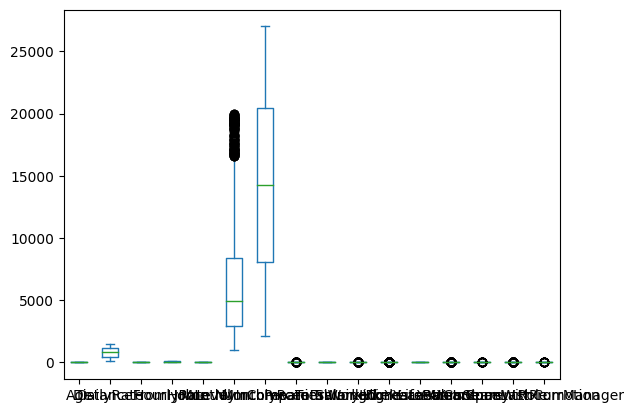

In [57]:
Numerical_employee_df.plot.box()

수치형 변수들을 전체적인 boxplot을 통해 살펴보았다. \

변수들의 스케일 편차가 심하므로 그래프를 통한 비교보다는 이상치가 존재하는 feature들만 함수를 만들어 선별하여 각각 feature의 boxplot을 직접 살펴보는 것이 좋겠다.

In [59]:
Outlier_column_list = []

def isOutlier(DataFrame, Outlier_list):

    for i in DataFrame.columns:
        q1 = DataFrame[i].quantile(0.2)
        q3 = DataFrame[i].quantile(0.75)
        iqr = q3 - q1

        outliers = DataFrame[i][(DataFrame[i] > (q3 + 1.5 * iqr)) | (DataFrame[i] < (q1 - 1.5 * iqr))]

        if len(outliers) > 0:
            Outlier_list.append(i)

        else:
            pass

isOutlier(Numerical_employee_df, Outlier_column_list)

print(Outlier_column_list)
print("이상치가 존재하는 수치형 feauture의 수: ",len(Outlier_column_list))

['MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
이상치가 존재하는 수치형 feauture의 수:  8


이상치가 존재하는 feature들만 판별하여 리스트로 반환하는 함수를 만들었다.

<Axes: >

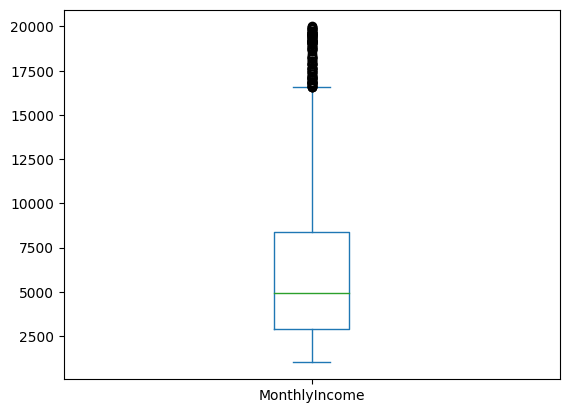

In [60]:
Numerical_employee_df[Outlier_column_list[0]].plot.box()

<Axes: >

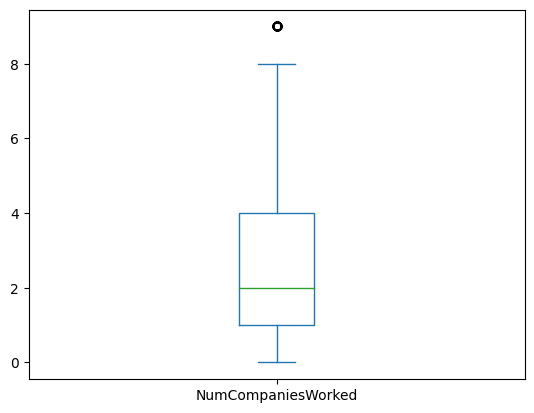

In [61]:
Numerical_employee_df[Outlier_column_list[1]].plot.box()

<Axes: >

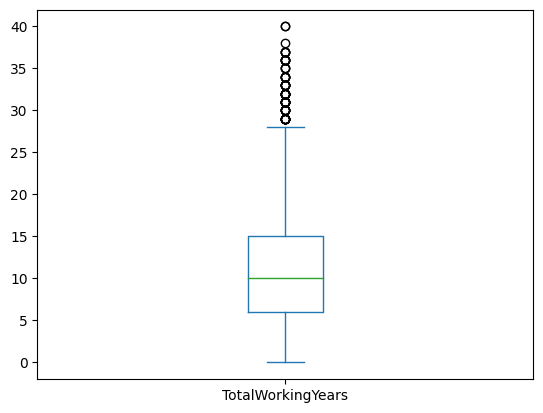

In [62]:
Numerical_employee_df[Outlier_column_list[2]].plot.box()

<Axes: >

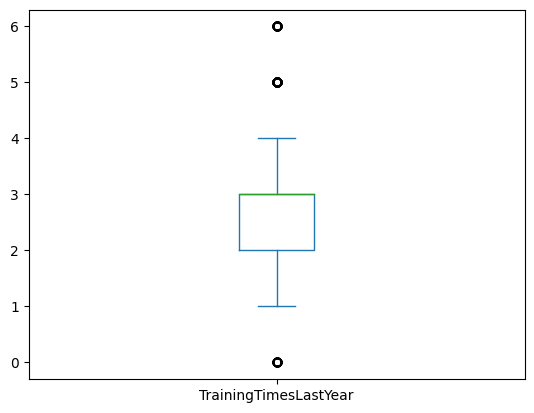

In [63]:
Numerical_employee_df[Outlier_column_list[3]].plot.box()

<Axes: >

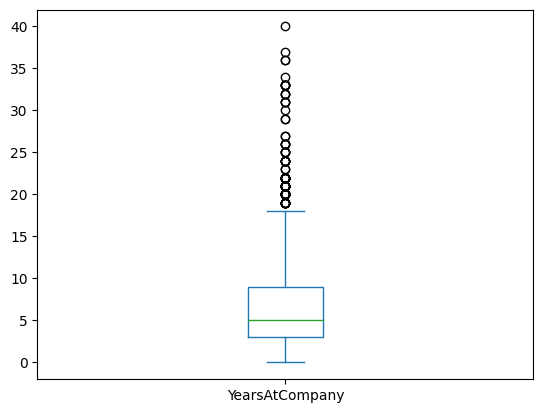

In [64]:
Numerical_employee_df[Outlier_column_list[4]].plot.box()

<Axes: >

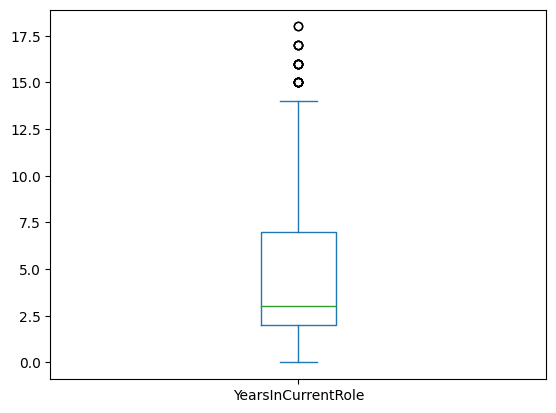

In [65]:
Numerical_employee_df[Outlier_column_list[5]].plot.box()

<Axes: >

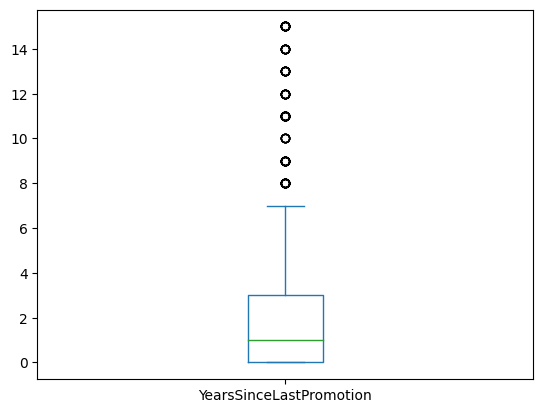

In [66]:
Numerical_employee_df[Outlier_column_list[6]].plot.box()

<Axes: >

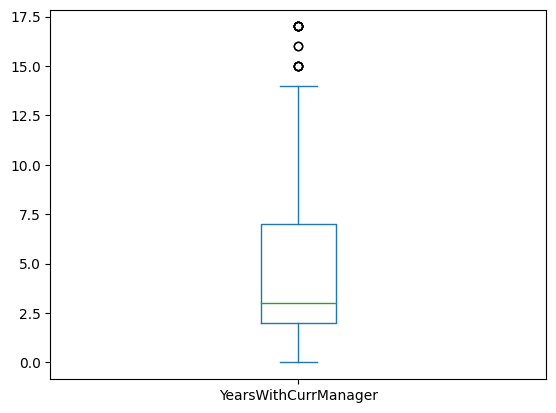

In [67]:
Numerical_employee_df[Outlier_column_list[7]].plot.box()

이상치가 존재하는 feature들의 boxplot을 확인해본 결과, 대부분이 q3보다 값이 큰 이상치들이 몰려있다는 것을 확인할 수 있다.

In [68]:
Numerical_employee_df

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,94,2,5993,19479,8,11,8,0,1,6,4,0,5
1,49,279,8,61,2,5130,24907,1,23,10,3,3,10,7,1,7
2,37,1373,2,92,1,2090,2396,6,15,7,3,3,0,0,0,0
3,33,1392,3,56,1,2909,23159,1,11,8,3,3,8,7,3,0
4,27,591,2,40,1,3468,16632,9,12,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,41,2,2571,12290,4,17,17,3,3,5,2,0,3
1466,39,613,6,42,3,9991,21457,4,15,9,5,3,7,7,1,7
1467,27,155,4,87,2,6142,5174,1,20,6,0,3,6,2,0,3
1468,49,1023,2,63,2,5390,13243,2,14,17,3,2,9,6,0,8


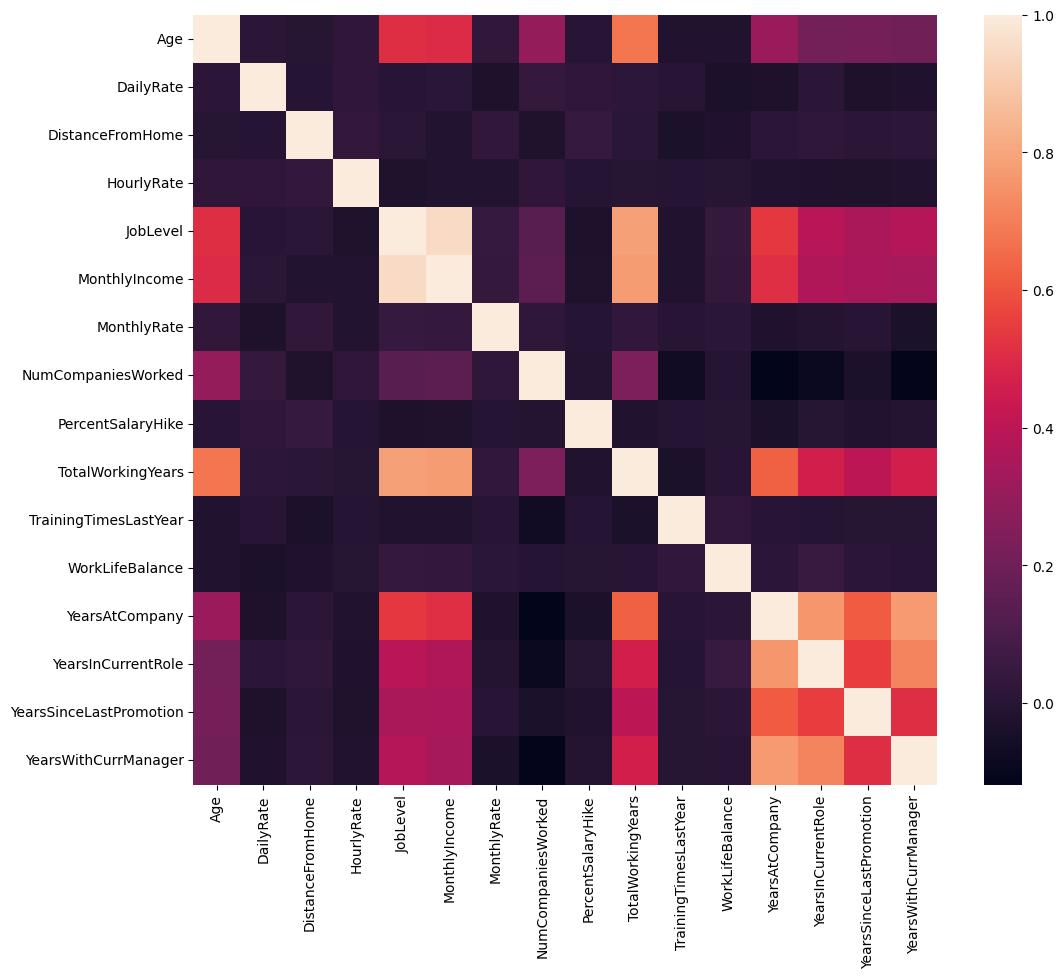

In [69]:
plt.figure(figsize=(12,10))
Numerical_variable_heatmap = sns.heatmap(Numerical_employee_df.corr())

수치형 변수들 간의 히트맵을 그려서 상관관계를 조사해 보았다. \

나이가 많을수록 직급과 월급이 더 높을 것이라는 보편적인 생각처럼 'Age'와 'MonthlyIncome', 'JobLevel'의 상관관계가 높은 것을 볼 수 있다. 또한 'Age'와 총 근속년수인 'TotalWorkingYears'의 상관관계도 굉장히 높다. \

'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyRate', 'PercentSalaryHike', 'TrainingTimesLastYear', 'WorkLifeBalance' 의 feature들은 다른 변수와 상관관계가 거의 없는 것으로 드러났다. \



In [27]:
Numerical_employee_df['YearsAtCompany'] / Numerical_employee_df['YearsWithCurrManager']

0       1.200000
1       1.428571
2            NaN
3            inf
4       1.000000
          ...   
1465    1.666667
1466    1.000000
1467    2.000000
1468    1.125000
1469    2.000000
Length: 1470, dtype: float64

<Axes: ylabel='Frequency'>

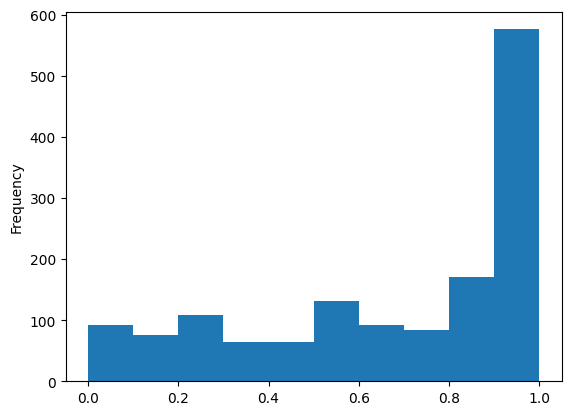

In [77]:
Current_Company_Working_Ratio = Numerical_employee_df['YearsAtCompany'] / Numerical_employee_df['TotalWorkingYears']
Current_Company_Working_Ratio.plot.hist()

직원들의 총 근속년수와 본 직장에서의 근속년수를 비교하는 파생변수를 생성하였다. \

히스토그램으로 살펴본 결과, 직원의 첫 직장으로 입사하고 쭉 다닌 사원의 비율이 압도적으로 가장 높은 것을 알 수 있다.

In [29]:
Categorical_Employee_df = Employee_attrition_total_df[Categorical_variable_column_list]

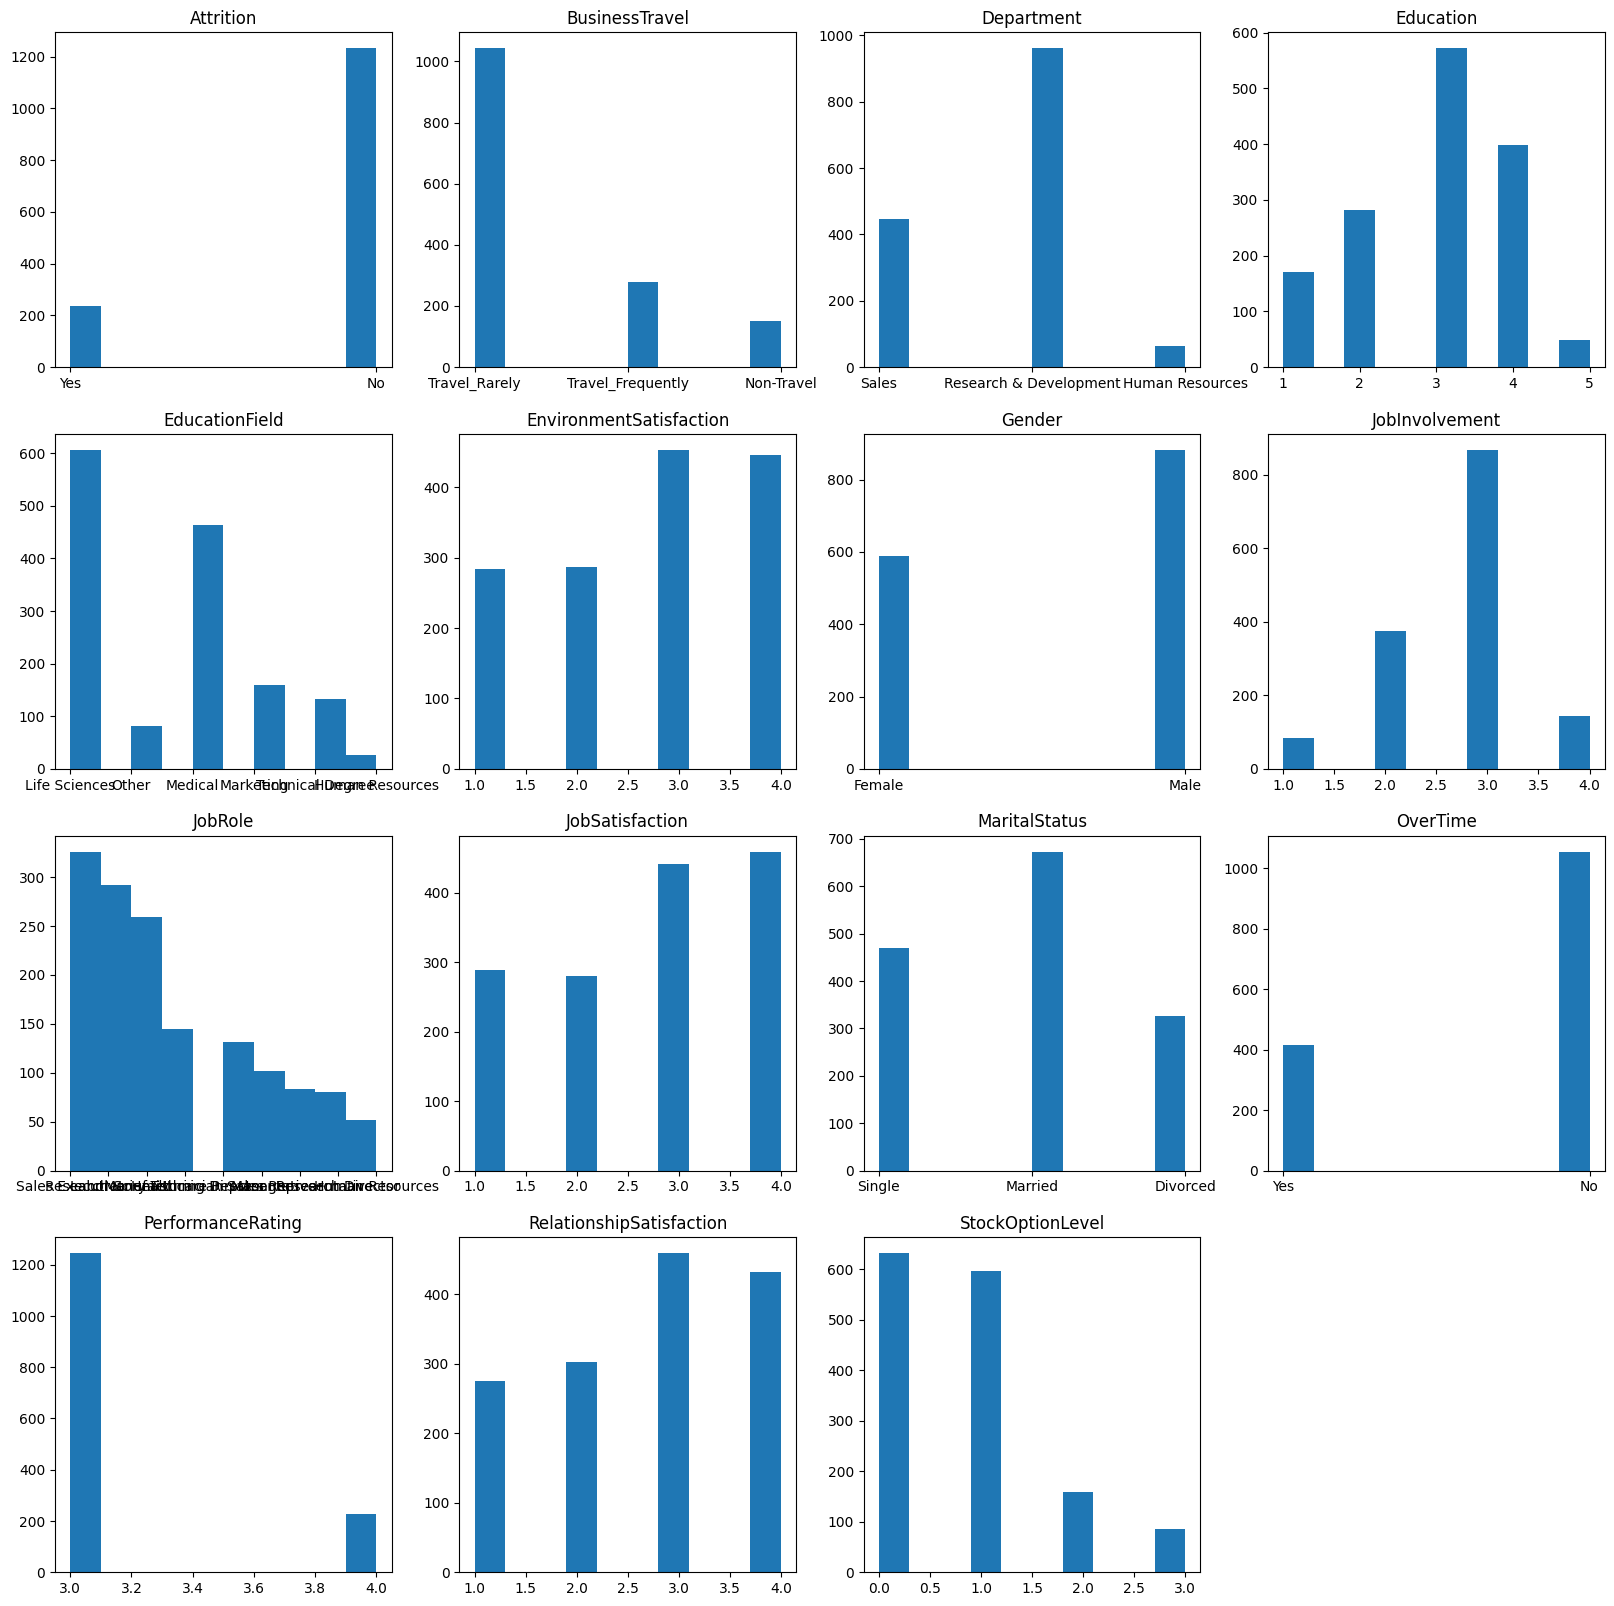

In [30]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(Categorical_variable_column_list):
    hist_plot = plt.subplot(4, 4, i+1)
    hist_plot.hist(Employee_attrition_total_df[column])
    hist_plot.set_title(column)

범주형 변수들의 히스토그램을 통해 분포를 살펴보았다. \



<Axes: >

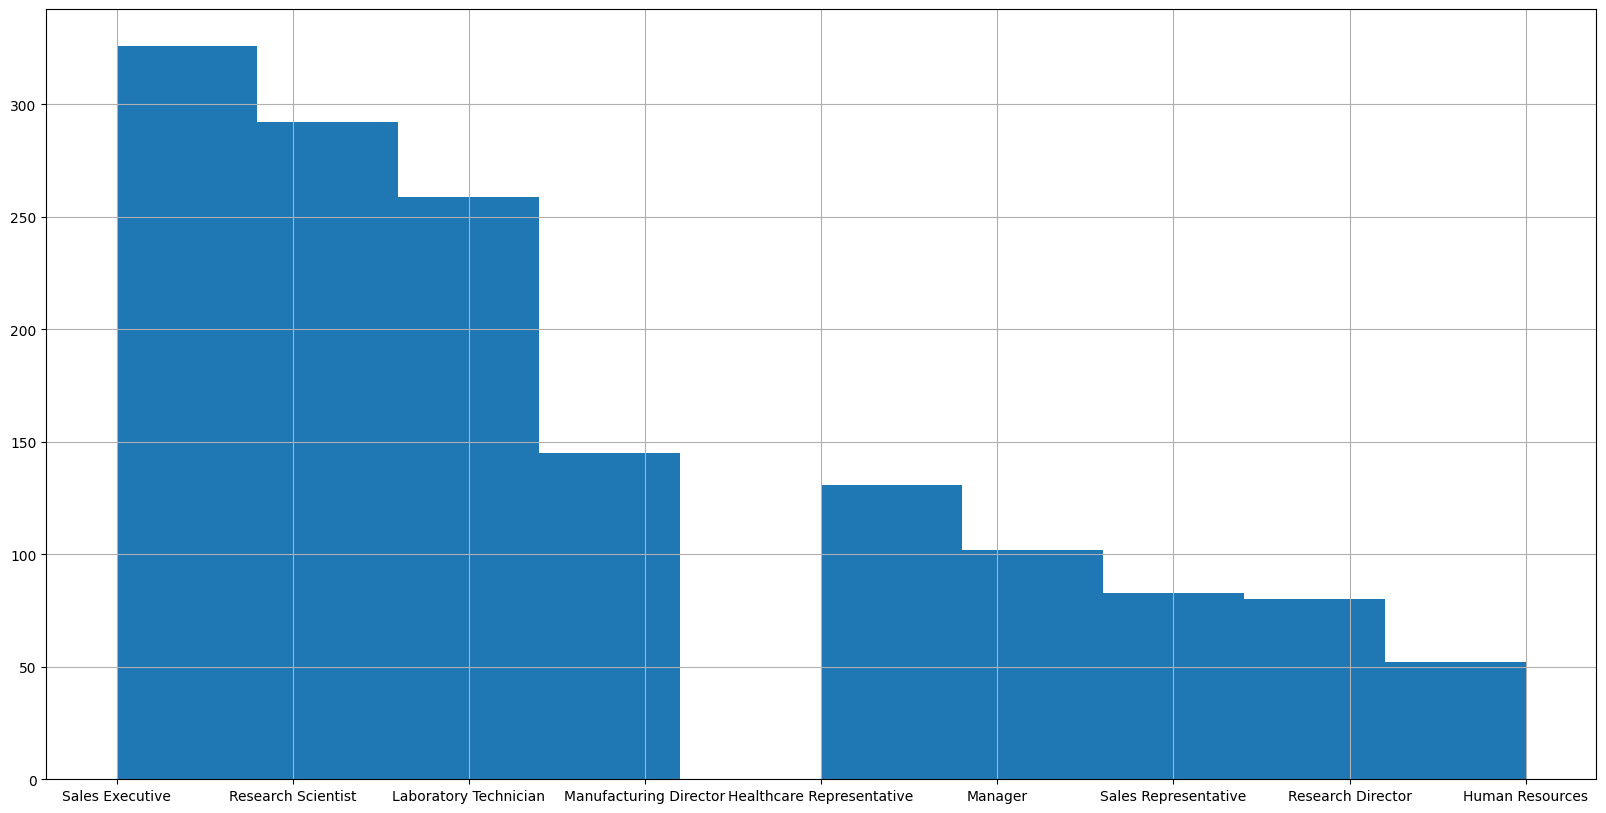

In [31]:
Categorical_Employee_df.JobRole.hist(figsize=(20, 10))

<Axes: >

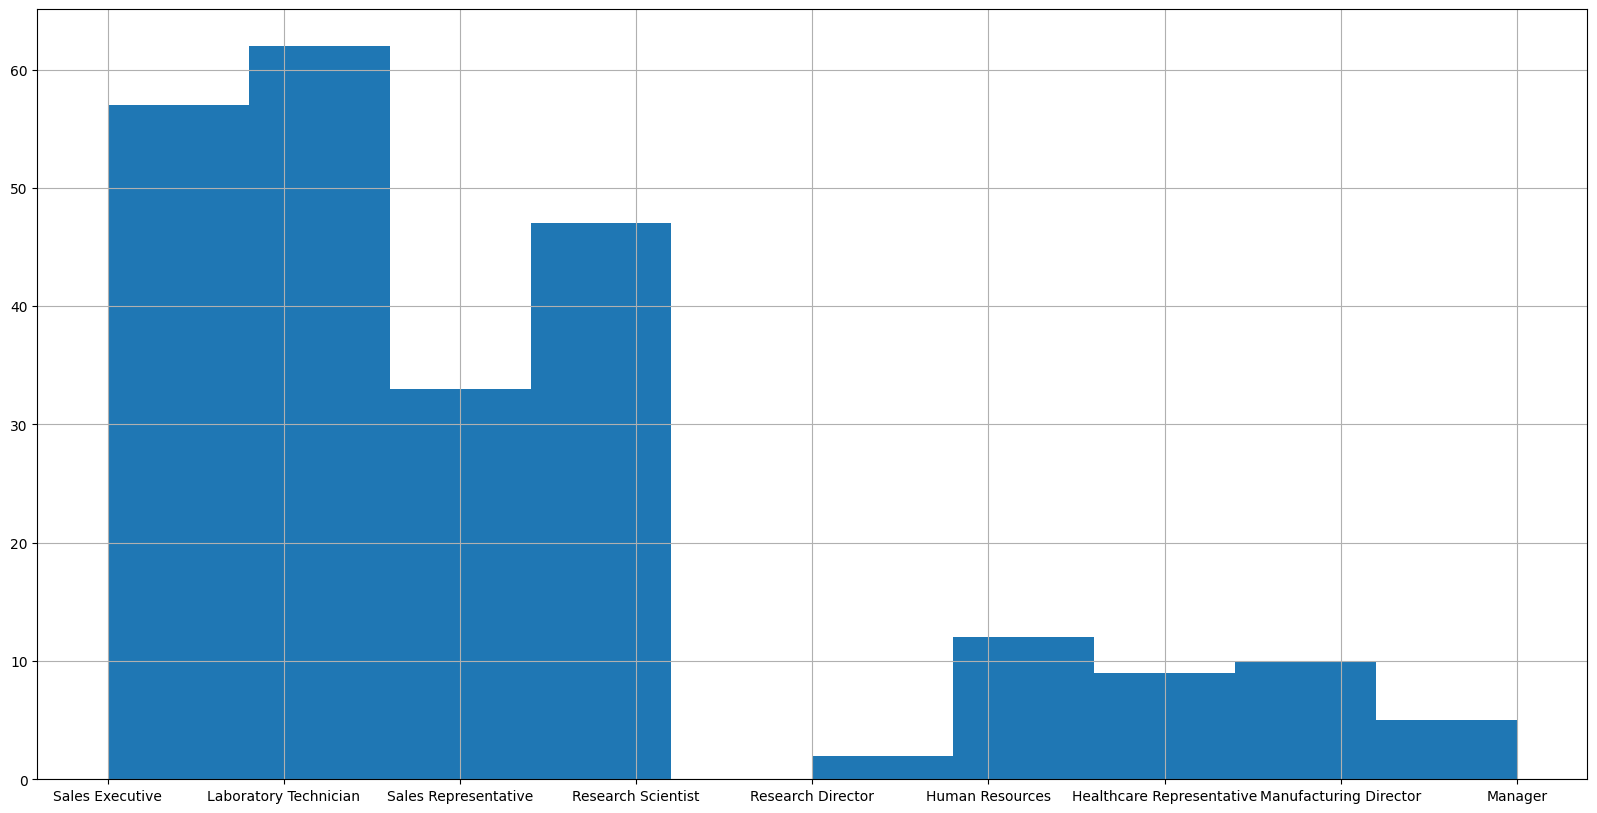

In [80]:
Attrition_about_JobRole_hist = Categorical_Employee_df['JobRole'][Categorical_Employee_df['Attrition']=='Yes'].hist(figsize=(20,10))
Attrition_about_JobRole_hist

직무 역할에 따른 퇴사율이 어떻게 형성되는지 궁금해졌다. 따라서 이에 대한 파생변수 생성해 보겠다.

In [81]:
Categorical_Employee_df['JobRole'][Categorical_Employee_df['Attrition']=='Yes'].value_counts(sort=False)

Sales Executive              57
Laboratory Technician        62
Sales Representative         33
Research Scientist           47
Research Director             2
Human Resources              12
Healthcare Representative     9
Manufacturing Director       10
Manager                       5
Name: JobRole, dtype: int64

In [82]:
Categorical_Employee_df['JobRole'].value_counts(sort=False)

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

<Axes: >

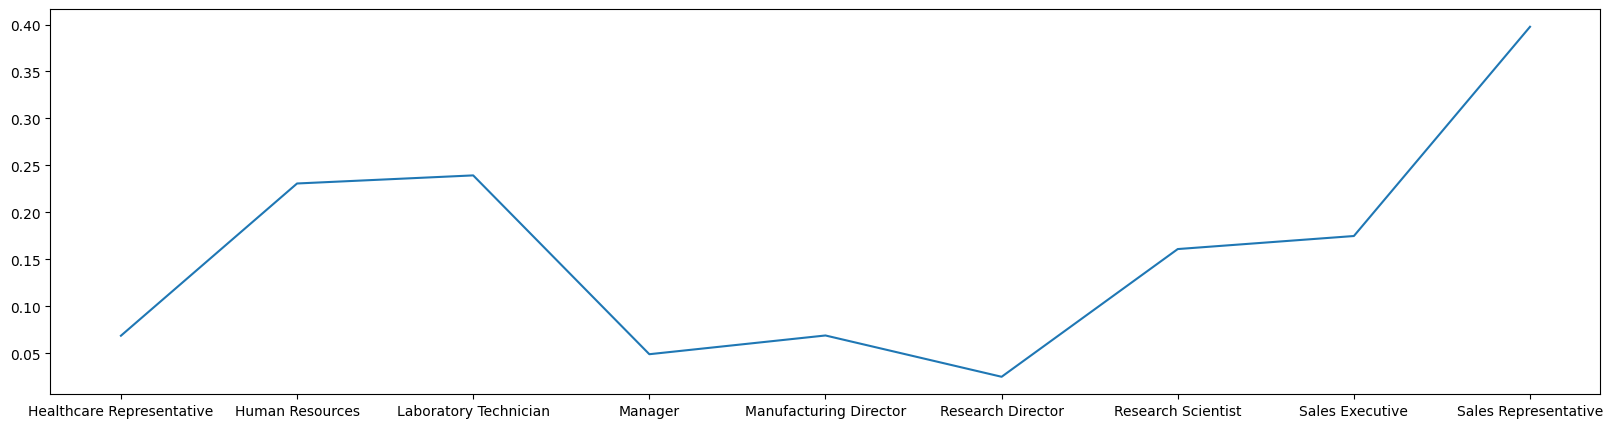

In [83]:
JobRole_Attrition_Ratio = Categorical_Employee_df['JobRole'][Categorical_Employee_df['Attrition']=='Yes'].value_counts(sort=False) / Categorical_Employee_df['JobRole'].value_counts(sort=False)
JobRole_Attrition_Ratio.plot(figsize=(20,5))

직무 역할별로 각 역할의 퇴사 인원의 수를 각 역할별 총 인원의 수로 나누어 직무 역할별의 퇴사율을 그래프로 나타내었다. \

퇴사율을 살펴봤을 때 'Sales Representative'의 퇴사율이 40%로 가장 높다. \

'Research Director', 'Manager', 'Healthcare Representative', 'Manufacturing Diretor'가 0.5% 부근으로 낮은 편이다. \

퇴사를 막기 위한 직무별 플랜을 세울 때 이 파생변수를 이용할 수 있을 것이다.